<a href="https://colab.research.google.com/github/K-107/Ventilator_Pressure_Prediction/blob/main/test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://www.kaggle.com/n3n77i/kaggle-breathdata

In [1]:
% cd /content/drive/MyDrive/Ventilator_Pressure_Prediction

/content/drive/MyDrive/Ventilator_Pressure_Prediction


In [2]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## 컬럼 이름들만 for문으로 잡는 법

In [56]:
for x in train_df:
  print(x)

id
breath_id
R
C
time_step
u_in
u_out
pressure


In [57]:
labels = [x for x in train_df]

In [58]:
labels

['id', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out', 'pressure']

# https://www.kaggle.com/sagarikajadon/lag-features-and-lgbm-baseline-cv-0-59

In [65]:
df = pd.read_csv('train.csv')

In [60]:
df

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


In [61]:
pd.get_dummies(df['R'], prefix= "R_")

,R__5,R__20,R__50
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
6035995,0,0,1
6035996,0,0,1
6035997,0,0,1
6035998,0,0,1


In [62]:
#categorical features
dfr= pd.get_dummies(df['R'], prefix= "R_")
df= pd.concat([df, dfr], axis= 1)
dfc= pd.get_dummies(df['C'], prefix= "C_")
df= pd.concat([df, dfc], axis= 1)
df= df.drop(['R', 'C'], axis= 1)

In [63]:
df

,id,breath_id,time_step,u_in,u_out,pressure,R__5,R__20,R__50,C__10,C__20,C__50
0,1,1,0.000000,0.083334,0,5.837492,0,1,0,0,0,1
1,2,1,0.033652,18.383041,0,5.907794,0,1,0,0,0,1
2,3,1,0.067514,22.509278,0,7.876254,0,1,0,0,0,1
3,4,1,0.101542,22.808822,0,11.742872,0,1,0,0,0,1
4,5,1,0.135756,25.355850,0,12.234987,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6035995,6035996,125749,2.504603,1.489714,1,3.869032,0,0,1,1,0,0
6035996,6035997,125749,2.537961,1.488497,1,3.869032,0,0,1,1,0,0
6035997,6035998,125749,2.571408,1.558978,1,3.798729,0,0,1,1,0,0
6035998,6035999,125749,2.604744,1.272663,1,4.079938,0,0,1,1,0,0


In [64]:
df['u_in_cumsum']= df['u_in'].groupby(df['breath_id']).cumsum()
df['time_step_cumsum']= df['time_step'].groupby(df['breath_id']).cumsum()
df

,id,breath_id,time_step,u_in,u_out,pressure,R__5,R__20,R__50,C__10,C__20,C__50,u_in_cumsum,time_step_cumsum
0,1,1,0.000000,0.083334,0,5.837492,0,1,0,0,0,1,0.083334,0.000000
1,2,1,0.033652,18.383041,0,5.907794,0,1,0,0,0,1,18.466375,0.033652
2,3,1,0.067514,22.509278,0,7.876254,0,1,0,0,0,1,40.975653,0.101167
3,4,1,0.101542,22.808822,0,11.742872,0,1,0,0,0,1,63.784476,0.202709
4,5,1,0.135756,25.355850,0,12.234987,0,1,0,0,0,1,89.140326,0.338464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035995,6035996,125749,2.504603,1.489714,1,3.869032,0,0,1,1,0,0,387.109297,95.147046
6035996,6035997,125749,2.537961,1.488497,1,3.869032,0,0,1,1,0,0,388.597794,97.685006
6035997,6035998,125749,2.571408,1.558978,1,3.798729,0,0,1,1,0,0,390.156772,100.256414
6035998,6035999,125749,2.604744,1.272663,1,4.079938,0,0,1,1,0,0,391.429435,102.861158


# https://www.kaggle.com/sauravdeb98/ventilator-pressure

In [75]:
train_data = pd.read_csv('train.csv')

train_data['breath_id'].value_counts()

4094     80
30028    80
30031    80
38227    80
46423    80
         ..
47775    80
84641    80
92837    80
96935    80
16392    80
Name: breath_id, Length: 75450, dtype: int64

In [76]:
train_data['R'].value_counts()

50    2410080
5     1988800
20    1637120
Name: R, dtype: int64

In [77]:
train_data['C'].value_counts()

10    2244720
50    1971680
20    1819600
Name: C, dtype: int64

In [78]:
train_data['u_in'].value_counts()

0.000000      1432253
100.000000      21739
1.277707           76
1.494747           70
0.058727           67
               ...   
2.615011            1
4.660273            1
9.463995            1
4.984399            1
0.767021            1
Name: u_in, Length: 4020248, dtype: int64

In [79]:
train_data['u_out'].value_counts()

1    3745032
0    2290968
Name: u_out, dtype: int64

In [80]:
train_data['pressure'].value_counts()

 6.399909     198642
 6.470211     188844
 6.329607     180688
 6.259305     180582
 6.610815     164401
               ...  
 62.711927         6
 62.641625         5
 63.274345         4
 62.360417         3
-1.895744          3
Name: pressure, Length: 950, dtype: int64

# https://www.kaggle.com/gauravbrills/ventilator-pressure-prediction-autogluon-fiddle

In [93]:
train = pd.read_csv('train.csv')

columns = [x for x in train]
columns

['id', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out', 'pressure']

In [97]:
chosen_columns = ['R', 'C', 'u_in', 'u_out', 'pressure']

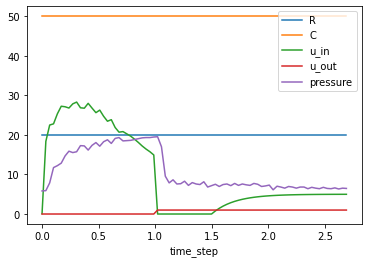

In [98]:
train[train["breath_id"]==1].plot.line(x='time_step', y=chosen_columns)

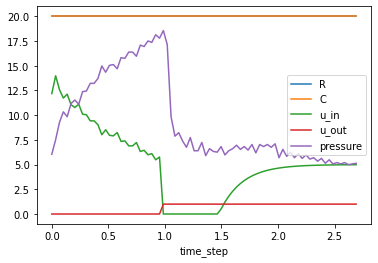

In [99]:
train[train["breath_id"]==2].plot.line(x='time_step', y=chosen_columns)

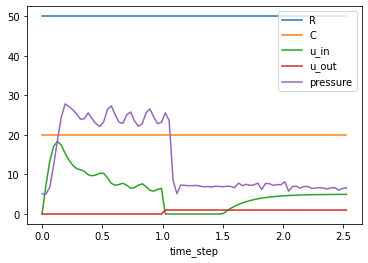

In [100]:
train[train["breath_id"]==3].plot.line(x='time_step', y=chosen_columns)

In [104]:
# 그룹바이에서 shift를 하면 그 묶인 그룹에서 이동하는 것이다!

shift1_train = train.groupby('breath_id')['u_in'].shift(1)
shift1_train

0                NaN
1           0.083334
2          18.383041
3          22.509278
4          22.808822
             ...    
6035995     1.420711
6035996     1.489714
6035997     1.488497
6035998     1.558978
6035999     1.272663
Name: u_in, Length: 6036000, dtype: float64

In [117]:
shift1_train[shift1_train.isnull()]

0         NaN
80        NaN
160       NaN
240       NaN
320       NaN
           ..
6035600   NaN
6035680   NaN
6035760   NaN
6035840   NaN
6035920   NaN
Name: u_in, Length: 75450, dtype: float64

In [102]:
train.groupby('breath_id')['u_in'].shift(-1)

0          18.383041
1          22.509278
2          22.808822
3          25.355850
4          27.259866
             ...    
6035995     1.488497
6035996     1.558978
6035997     1.272663
6035998     1.482739
6035999          NaN
Name: u_in, Length: 6036000, dtype: float64

In [103]:
train.groupby(['breath_id'])['u_in'].transform('max')

0          28.313036
1          28.313036
2          28.313036
3          28.313036
4          28.313036
             ...    
6035995    25.504196
6035996    25.504196
6035997    25.504196
6035998    25.504196
6035999    25.504196
Name: u_in, Length: 6036000, dtype: float64

# https://www.kaggle.com/kokinishimaki/ventilator-pressure-eda-and-simple-submission

In [118]:
train = pd.read_csv('train.csv')

In [119]:
train['breath_id']

0               1
1               1
2               1
3               1
4               1
            ...  
6035995    125749
6035996    125749
6035997    125749
6035998    125749
6035999    125749
Name: breath_id, Length: 6036000, dtype: int64

In [120]:
train.nunique().to_frame()
# breath_id의 125749-75450=50299는 테스트다.

,0
id,6036000
breath_id,75450
R,3
C,3
time_step,3767571
u_in,4020248
u_out,2
pressure,950


In [122]:
test = pd.read_csv('test.csv')
test.nunique().to_frame()

,0
id,4024000
breath_id,50300
R,3
C,3
time_step,2855528
u_in,2787790
u_out,2


In [124]:
train.groupby("breath_id")["time_step"].count().unique().item()
# 모든 호흡마다 타임스텝은 80개이다. 테스트도 마찬가지다.

80

In [126]:
train.isnull().sum(axis = 0).to_frame()
# 미싱데이터는 없다!

,0
id,0
breath_id,0
R,0
C,0
time_step,0
u_in,0
u_out,0
pressure,0


In [127]:
train.time_step.max()
# 가장 긴 숨. 3초가 안됨.

2.9372379779815674

In [130]:
# 이 둘은 같은 것이다. 차이를 익혀라!
train['time_step'].groupby(train['breath_id']).max()

breath_id
1         2.689766
2         2.690624
3         2.525398
4         2.528579
5         2.724876
            ...   
125740    2.721422
125742    2.665376
125743    2.666352
125745    2.508653
125749    2.638017
Name: time_step, Length: 75450, dtype: float64

In [131]:
train.groupby('breath_id')['time_step'].max()

breath_id
1         2.689766
2         2.690624
3         2.525398
4         2.528579
5         2.724876
            ...   
125740    2.721422
125742    2.665376
125743    2.666352
125745    2.508653
125749    2.638017
Name: time_step, Length: 75450, dtype: float64

# https://www.kaggle.com/squarex/ventilator-pressure-prediction-lgb-eda

In [9]:
X = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

In [10]:
# 컬럼 보는 방법
X.columns, X_test.columns

(Index(['id', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out', 'pressure'], dtype='object'),
 Index(['id', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out'], dtype='object'))

In [11]:
# difference 함수!
X.columns.difference(X_test.columns)

Index(['pressure'], dtype='object')

In [12]:
print(X.columns.difference(X_test.columns))
y = X.pop('pressure')
# 팝은 밖으로 빼서 원래 자리에 없다.

Index(['pressure'], dtype='object')


In [21]:
X.groupby('breath_id')['R'].nunique()

breath_id
1         1
2         1
3         1
4         1
5         1
         ..
125740    1
125742    1
125743    1
125745    1
125749    1
Name: R, Length: 75450, dtype: int64

In [15]:
'''
https://mizykk.tistory.com/103
데이터에 고유값이 무엇이 있는지 알고 싶다면 unique 

총 고유값의 수가 몇 개인지 알고 싶다면 nunique

값별로 데이터의 개수를 알고 싶다면 value_counts
'''

'\nhttps://mizykk.tistory.com/103\n데이터에 고유값이 무엇이 있는지 알고 싶다면 unique \n\n총 고유값의 수가 몇 개인지 알고 싶다면 nunique\n\n값별로 데이터의 개수를 알고 싶다면 value_counts\n'

In [24]:
X

,id,breath_id,R,C,time_step,u_in,u_out
0,1,1,20,50,0.000000,0.083334,0
1,2,1,20,50,0.033652,18.383041,0
2,3,1,20,50,0.067514,22.509278,0
3,4,1,20,50,0.101542,22.808822,0
4,5,1,20,50,0.135756,25.355850,0
...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1
6035996,6035997,125749,50,10,2.537961,1.488497,1
6035997,6035998,125749,50,10,2.571408,1.558978,1
6035998,6035999,125749,50,10,2.604744,1.272663,1


In [25]:
y

0           5.837492
1           5.907794
2           7.876254
3          11.742872
4          12.234987
             ...    
6035995     3.869032
6035996     3.869032
6035997     3.798729
6035998     4.079938
6035999     3.869032
Name: pressure, Length: 6036000, dtype: float64

In [29]:
# 이거랑 아래꺼랑 똑같다!
X[X['breath_id']==1]

,id,breath_id,R,C,time_step,u_in,u_out
0,1,1,20,50,0.000000,0.083334,0
1,2,1,20,50,0.033652,18.383041,0
2,3,1,20,50,0.067514,22.509278,0
3,4,1,20,50,0.101542,22.808822,0
4,5,1,20,50,0.135756,25.355850,0
...,...,...,...,...,...,...,...
75,76,1,20,50,2.553593,4.974474,1
76,77,1,20,50,2.587754,4.978481,1
77,78,1,20,50,2.621773,4.981847,1
78,79,1,20,50,2.655746,4.984683,1


In [27]:
X.loc[X['breath_id'] == 1, :]

,id,breath_id,R,C,time_step,u_in,u_out
0,1,1,20,50,0.000000,0.083334,0
1,2,1,20,50,0.033652,18.383041,0
2,3,1,20,50,0.067514,22.509278,0
3,4,1,20,50,0.101542,22.808822,0
4,5,1,20,50,0.135756,25.355850,0
...,...,...,...,...,...,...,...
75,76,1,20,50,2.553593,4.974474,1
76,77,1,20,50,2.587754,4.978481,1
77,78,1,20,50,2.621773,4.981847,1
78,79,1,20,50,2.655746,4.984683,1


In [35]:
X.loc[X['breath_id'] == 1, :].assign(time_diff=lambda x: x['time_step'].diff(),y=y)
'''
assign은 기존 데이터프레임에 새로운 열을 추가할 때 사용.
time_diff, y가 새로운 컬럼으로 들어가는 것이다.
.diff()는 차분이다.
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=rising_n_falling&logNo=221631637822

'''

,id,breath_id,R,C,time_step,u_in,u_out,time_diff,y
0,1,1,20,50,0.000000,0.083334,0,NaN,5.837492
1,2,1,20,50,0.033652,18.383041,0,0.033652,5.907794
2,3,1,20,50,0.067514,22.509278,0,0.033862,7.876254
3,4,1,20,50,0.101542,22.808822,0,0.034028,11.742872
4,5,1,20,50,0.135756,25.355850,0,0.034213,12.234987
...,...,...,...,...,...,...,...,...,...
75,76,1,20,50,2.553593,4.974474,1,0.034092,6.399909
76,77,1,20,50,2.587754,4.978481,1,0.034160,6.610815
77,78,1,20,50,2.621773,4.981847,1,0.034020,6.329607
78,79,1,20,50,2.655746,4.984683,1,0.033972,6.540513


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f50ea23d410>,
      dtype=object)

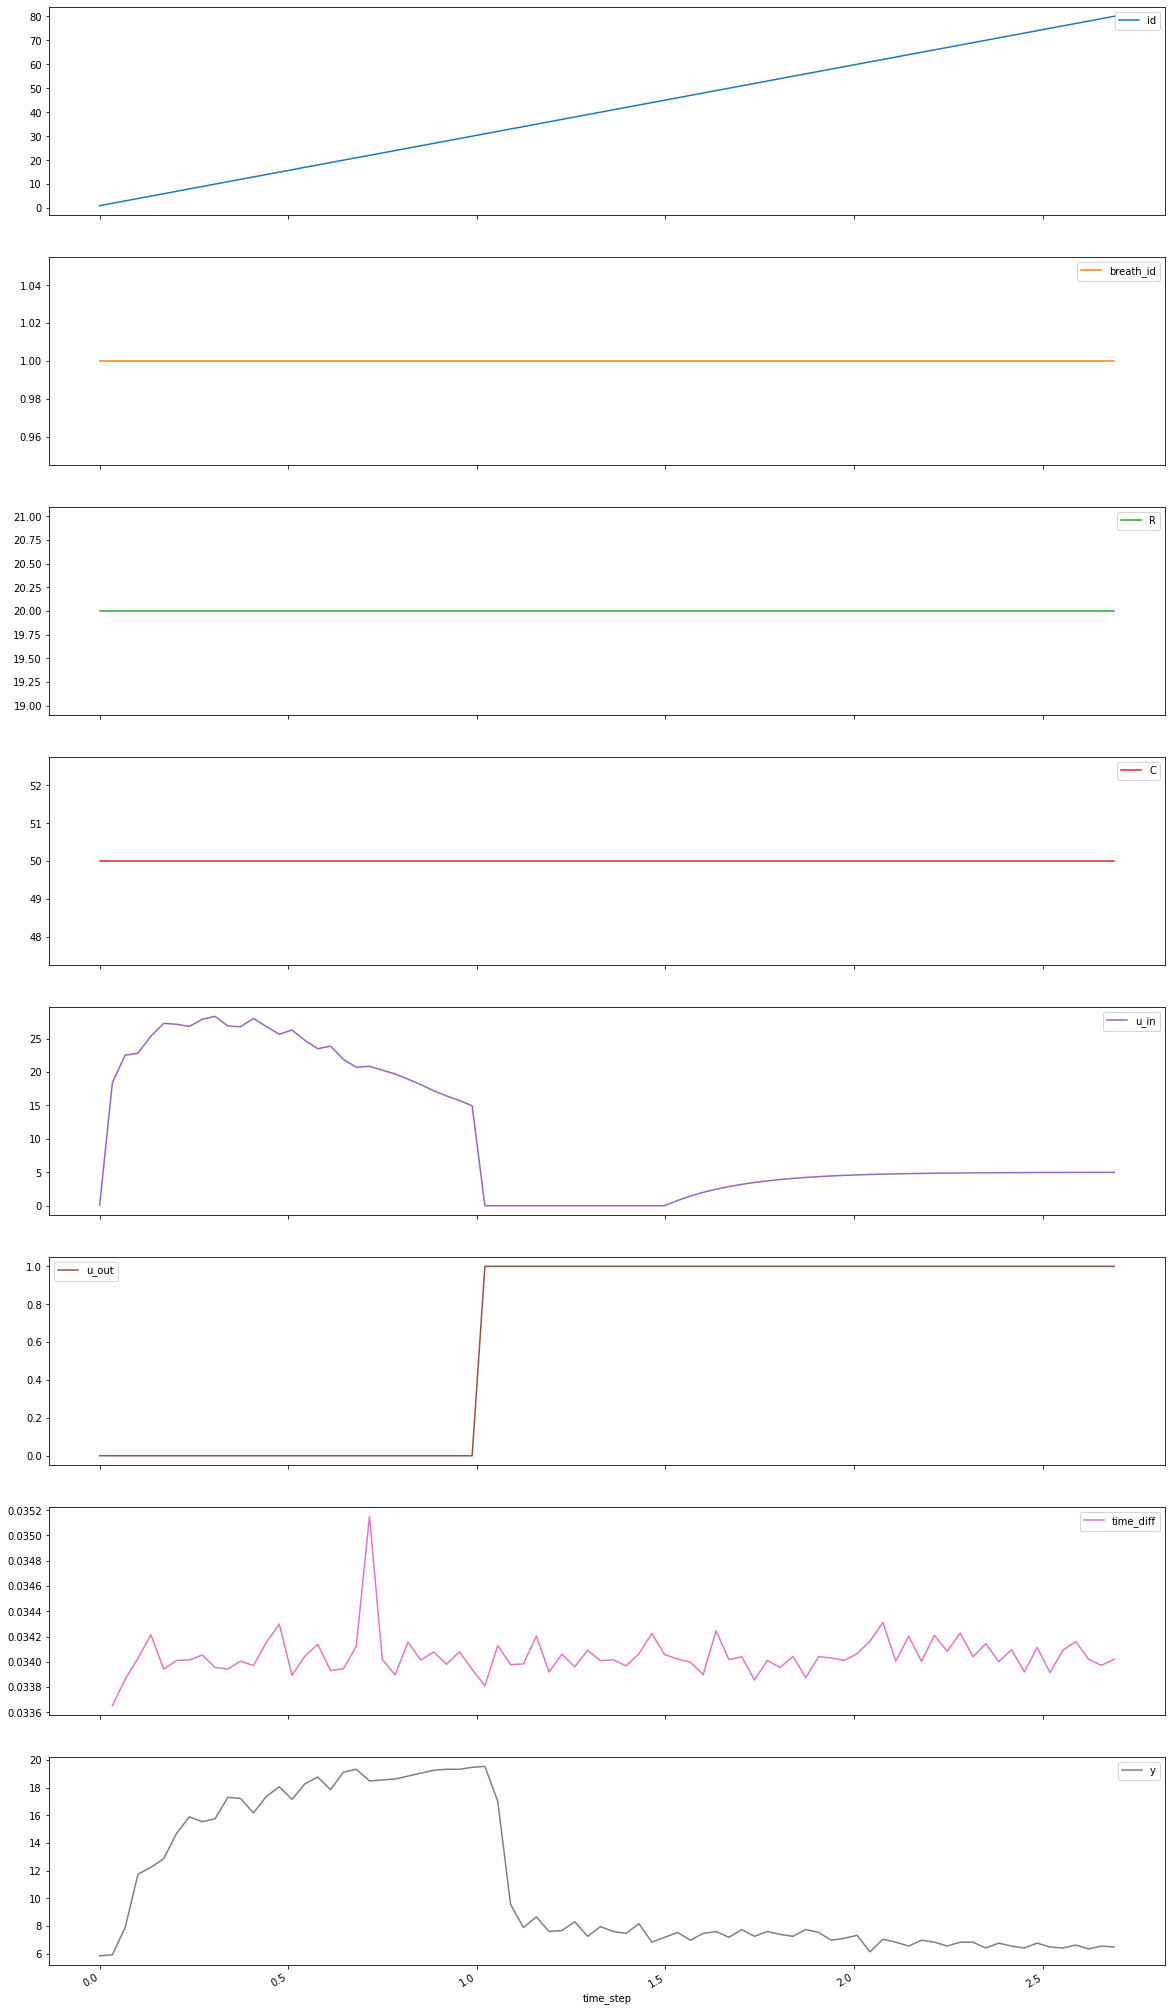

In [38]:
# 이 그림 개추천!!

X.loc[X['breath_id'] == 1, :].assign(time_diff=lambda x: x['time_step'].diff(),y=y)\
.plot(x='time_step', subplots=True, figsize=(20, 40))